In [1409]:
%matplotlib inline

In [1410]:
import lightkurve as lk

In [1411]:
import numpy as np

In [1412]:
import matplotlib.pyplot as plt

In [1413]:
search_ffi = lk.search_tesscut('TIC 470951963')

In [1414]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,TESScut,158,TIC 470951963,0.0


In [1415]:
search_tpf = lk.search_targetpixelfile('TIC 470951963')

In [1416]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,470951963,0.0


In [1417]:
search_lcf = lk.search_lightcurve('TIC 470951963')

In [1418]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,470951963,0.0


In [1419]:
search_lcf_refined = lk.search_lightcurve('TIC 470951963')

In [1420]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,470951963,0.0


In [1421]:
lcf = search_lcf_refined.download_all()

In [1422]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 470951963" SECTOR=60 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [1423]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2936.9082849164206,———,———,4.9420544e-03,1230803,1405.61504,280.63414,2.6304258e+03,7.2584352e+00,1.0881301e+03,2.8000970e+00,———,———,1000000000000,———,———,———,———,1405.61504,2.3317826e-03,280.63414,1.7820799e-03,1.4770490e-02,-1.1454014e-01
2936.9096738028193,———,———,4.9420525e-03,1230804,1405.62183,280.63304,2.6198674e+03,7.2428493e+00,1.0862704e+03,2.7973287e+00,———,———,1000000000000,———,———,———,———,1405.62183,2.3374392e-03,280.63304,1.7857392e-03,2.0550882e-02,-1.1281100e-01
2936.911062689218,———,———,4.9420507e-03,1230805,1405.61858,280.63428,2.6135906e+03,7.2419930e+00,1.0861846e+03,2.7956398e+00,———,———,1000000000000,———,———,———,———,1405.61858,2.3406383e-03,280.63428,1.7865095e-03,1.4747109e-02,-1.1218244e-01
2936.9124515760827,———,———,4.9420493e-03,1230806,1405.61708,280.63627,2.6220505e+03,7.2499418e+00,1.0894248e+03,2.7971742e+00,———,———,1000000000000,———,———,———,———,1405.61708,2.3389689e-03,280.63627,1.7862002e-03,2.0313906e-02,-1.1150766e-01
2936.913840462482,———,———,4.9420474e-03,1230807,1405.61752,280.63358,2.6202405e+03,7.2540283e+00,1.0884340e+03,2.8030229e+00,———,———,1000000000000,———,———,———,———,1405.61752,2.3434584e-03,280.63358,1.7882484e-03,1.6979618e-02,-1.1429349e-01
2936.915229349346,———,———,4.9420460e-03,1230808,1405.61624,280.63266,2.6240383e+03,7.2535377e+00,1.0888086e+03,2.8009315e+00,———,———,1000000000000,———,———,———,———,1405.61624,2.3372208e-03,280.63266,1.7828115e-03,2.2234105e-02,-1.1495608e-01
2936.916618235745,———,———,4.9420442e-03,1230809,1405.61344,280.63090,2.6185818e+03,7.2504454e+00,1.0902797e+03,2.8002214e+00,———,———,1000000000000,———,———,———,———,1405.61344,2.3434164e-03,280.63090,1.7842255e-03,1.6954413e-02,-1.1639057e-01
2936.9180071221444,———,———,4.9420423e-03,1230810,1405.61604,280.63900,2.6407444e+03,7.2598190e+00,1.0853772e+03,2.7938612e+00,———,———,1000000000000,———,———,———,———,1405.61604,2.3255639e-03,280.63900,1.7761803e-03,1.8593449e-02,-1.0811874e-01


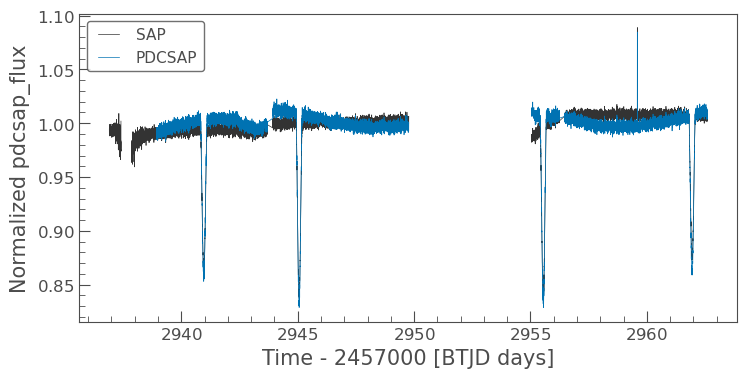

In [1424]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 470951963')

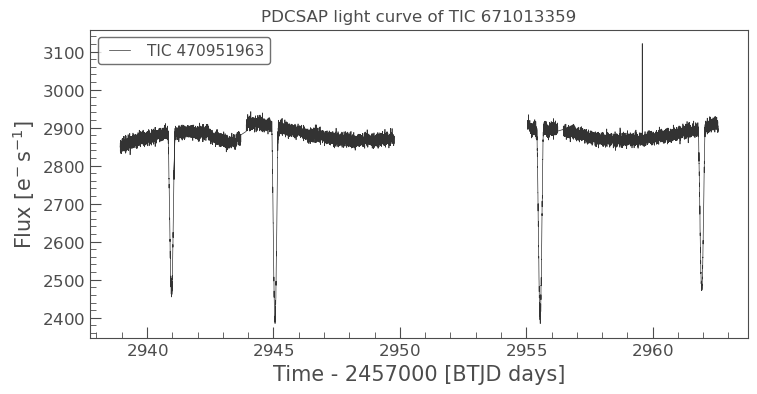

In [1425]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 671013359")

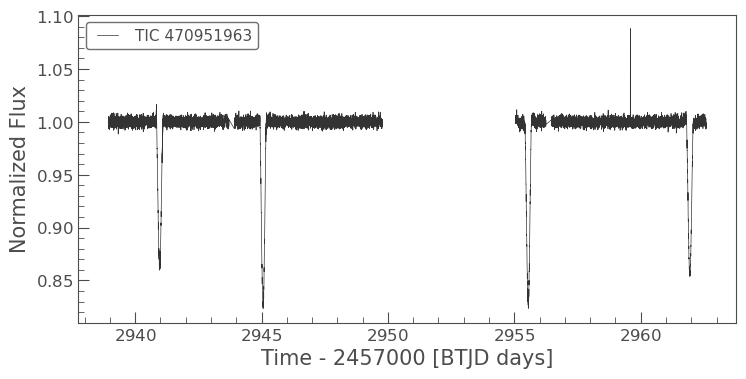

In [1426]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

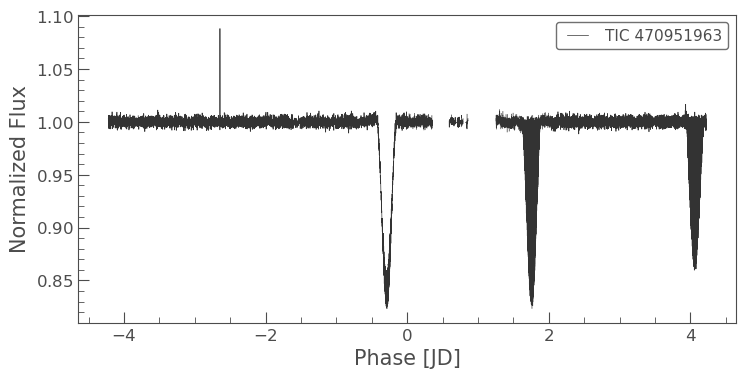

In [1427]:
folded_lc = flat_lc.fold(period=8.442)
folded_lc.plot();

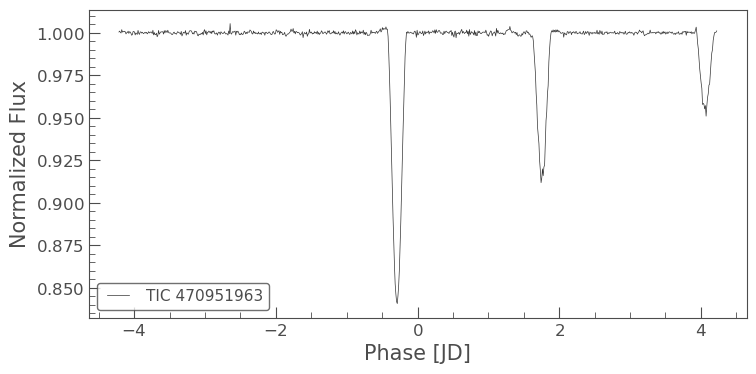

In [1428]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

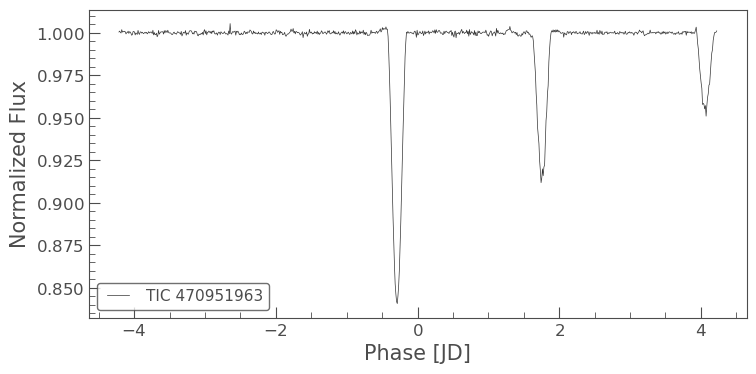

In [1429]:
lcf[0].flatten(window_length=401).fold(period=8.442).bin(time_bin_size=0.01).plot();

In [1430]:
lcf[0].interact_bls()

In [1431]:
ffi_data = search_ffi.download(cutout_size=20)

<AxesSubplot:title={'center':'Target ID: TIC 470951963, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

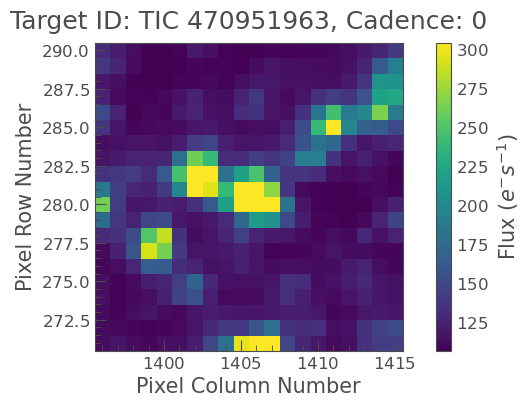

In [1432]:
ffi_data.plot()

In [1433]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

4

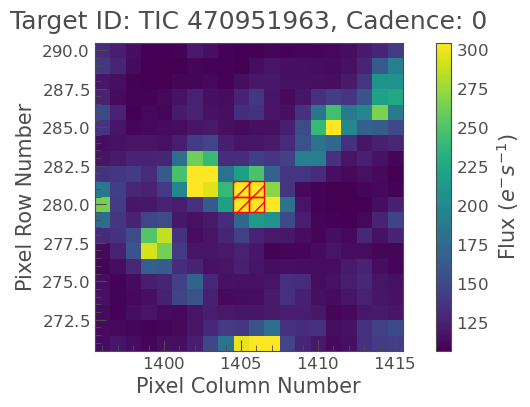

In [1434]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [1435]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [1436]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2936.9089141207187,2217.873046875,3.950054168701172,1405.5546409573415,280.4923850844216,0,0
2936.911228940542,2209.584716796875,3.9459073543548584,1405.5566483561772,280.49631252127654,1,0
2936.9135437603654,2209.24365234375,3.9431605339050293,1405.5555616565562,280.4941534962408,2,0
2936.9158585801874,2222.76904296875,3.9551503658294678,1405.5540148473353,280.49592176616255,3,0
2936.91817340001,2215.7939453125,3.948427438735962,1405.5563135970547,280.4921899274473,4,0
2936.920488219368,2207.3125,3.941970109939575,1405.556788725596,280.4941285413629,5,0
2936.922803039191,2219.810791015625,3.9527738094329834,1405.555629199618,280.49560832491505,6,0
2936.925117859013,2210.45361328125,3.9448392391204834,1405.555720634198,280.49208675916043,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

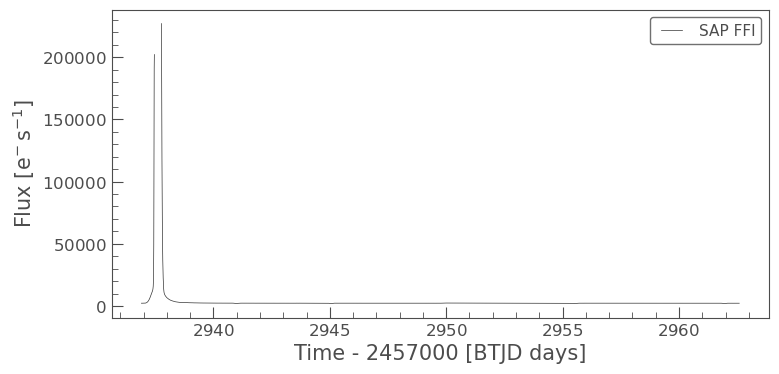

In [1437]:
ffi_lc.plot(label="SAP FFI")

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1128: LightkurveWarning: The light curve appears to be zero-centered (median=2.23e+03 electron / s +/- 8.68e+03 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

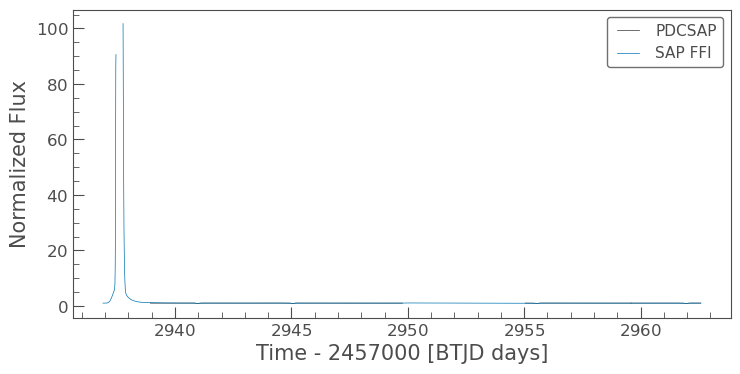

In [1438]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [1439]:
ffi_data.interact()

In [1440]:
ffi_data.interact_sky()

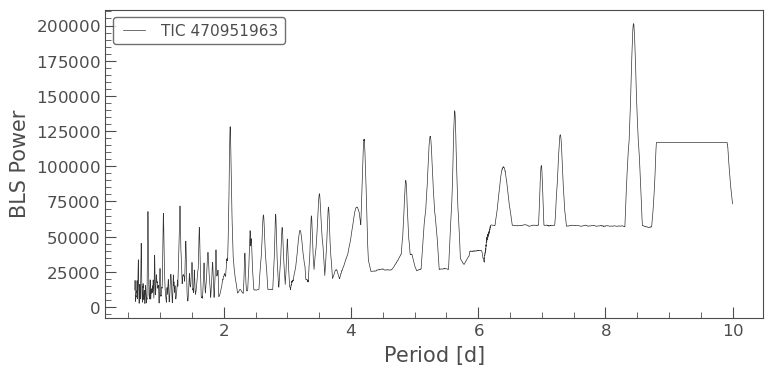

In [1441]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [1442]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 8.442 d


C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
